#  <center> Speech Emotion Recognition <center>

### พวกเรากำลังจะสร้างระบบจำแนกอารมณ์จากเสียงพูด (Speech Emotion Detection Classifier)

ก่อนที่เราจะเริ่มต้นพัฒนาโมเดล เรามาทำความเข้าใจกับแนวคิดของ **การจดจำอารมณ์จากเสียงพูด (Speech Emotion Recognition - SER)** และเหตุผลที่เราทำโปรเจกต์นี้กันก่อน  



### **การจดจำอารมณ์จากเสียงพูด (Speech Emotion Recognition - SER) คืออะไร?**  
การจดจำอารมณ์จากเสียงพูด (SER) เป็นเทคนิคที่พยายามระบุอารมณ์ของมนุษย์จากเสียงพูด ซึ่งอาศัยลักษณะของเสียง เช่น **โทนเสียง (Tone)** และ **ระดับเสียง (Pitch)** ที่สามารถสะท้อนอารมณ์ของผู้พูดได้  

เทคโนโลยีนี้อิงจากหลักการเดียวกับที่สัตว์ เช่น สุนัขหรือม้า ใช้ในการรับรู้และเข้าใจอารมณ์ของมนุษย์ผ่านเสียงพูด



### **ทำไมเราถึงต้องการระบบนี้?**  

1. **ความนิยมที่เพิ่มขึ้นของการจดจำอารมณ์**  
   การจดจำอารมณ์จากเสียงพูดเป็นหัวข้อที่ได้รับความสนใจมากขึ้นเรื่อยๆ โดยเฉพาะในงานที่เกี่ยวกับ **ปัญญาประดิษฐ์ (AI) และการประมวลผลเสียง** ปัจจุบันมีวิธีการมากมายที่ใช้ **Machine Learning** ในการจดจำอารมณ์ แต่โปรเจกต์นี้จะใช้เทคนิค **Deep Learning** เพื่อเพิ่มประสิทธิภาพในการวิเคราะห์อารมณ์จากเสียงพูด  

2. **ประยุกต์ใช้ในศูนย์บริการลูกค้า (Call Center Analytics)**  
   ระบบสามารถช่วย **วิเคราะห์บทสนทนา** และจำแนกอารมณ์ของลูกค้าในสายสนทนาได้ เช่น ตรวจจับลูกค้าที่ไม่พึงพอใจ หรือวัดระดับความพึงพอใจของลูกค้า ซึ่งช่วยให้บริษัทสามารถปรับปรุงการให้บริการได้ดีขึ้น  

3. **เพิ่มความปลอดภัยในระบบขับขี่อัจฉริยะ**  
   ระบบ SER สามารถนำไปใช้ใน **ยานพาหนะอัจฉริยะ** เพื่อตรวจสอบอารมณ์ของผู้ขับขี่ หากตรวจพบว่าผู้ขับขี่มีภาวะทางอารมณ์ที่อาจเป็นอันตราย เช่น เครียดหรือโกรธ ระบบสามารถแจ้งเตือนเพื่อป้องกันอุบัติเหตุได้  



### **ชุดข้อมูลที่ใช้ในโปรเจกต์**  
ในโปรเจกต์นี้ เราจะใช้ **ฐานข้อมูลเสียงที่มีการระบุอารมณ์ของผู้พูด** จากแหล่งข้อมูลต่อไปนี้  

- **CREMA-D (Crowd-sourced Emotional Multimodal Actors Dataset)** – ฐานข้อมูลที่เก็บตัวอย่างเสียงจากนักแสดงที่แสดงอารมณ์ต่างๆ  
- **RAVDESS (Ryerson Audio-Visual Database of Emotional Speech and Song)** – ฐานข้อมูลเสียงพูดและเพลงที่มีการแสดงอารมณ์ที่ชัดเจน  
- **SAVEE (Surrey Audio-Visual Expressed Emotion)** – ฐานข้อมูลเสียงที่มีการแสดงอารมณ์จากผู้พูดชาย  
- **TESS (Toronto Emotional Speech Set)** – ฐานข้อมูลเสียงของผู้หญิงสูงวัยที่แสดงอารมณ์ที่แตกต่างกัน  



โปรเจกต์นี้จะช่วยให้เราสามารถนำ **Deep Learning** มาใช้ในการจดจำอารมณ์จากเสียงพูด และต่อยอดไปสู่การใช้งานจริงในหลากหลายอุตสาหกรรม 🚀

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Dropout, GRU
from tensorflow.keras.preprocessing.sequence import pad_sequences
import scipy.signal

from pydub import AudioSegment
from pydub.playback import play
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

c:\Users\Wellc\anaconda3\envs\myevn\Lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


## Data Preparation  
* เนื่องจากเรากำลังทำงานกับชุดข้อมูลสี่ชุดต่าง ๆ ดังนั้นฉันจะสร้าง DataFrame เพื่อเก็บข้อมูลอารมณ์ทั้งหมดจากชุดข้อมูล พร้อมกับเส้นทางไฟล์ของข้อมูลแต่ละชุด  
* เราจะใช้ DataFrame นี้ในการดึงคุณลักษณะ (features) สำหรับการฝึกสอนโมเดล  

In [3]:
# Paths for data.
Ravdess = "DATASET/AudioWAV/"
Crema = "DATASET/audio_speech_actors_01-24/"
Tess = "DATASET/TESS Toronto emotional speech set data/"
Savee = "DATASET/ALL/"

##  <center> 1. Ravdess Dataframe <center>
ฐานข้อมูลเสียงพูดและเพลงที่แสดงอารมณ์ของ Ryerson (RAVDESS)
ไฟล์เสียงพูดเท่านั้น (16 บิต, 48kHz .wav) จาก RAVDESS
ชุดข้อมูลฉบับเต็มที่มีทั้งเสียงและวิดีโอ (ขนาด 24.8 GB) สามารถดาวน์โหลดได้จาก Zenodo
การสร้างและการตรวจสอบการรับรู้ของ RAVDESS ได้รับการอธิบายไว้ในงานวิจัย Open Access ที่ตีพิมพ์ในวารสาร PLoS ONE

จำนวนไฟล์ในชุดข้อมูล
ชุดข้อมูล RAVDESS ส่วนนี้มีไฟล์ทั้งหมด 1,440 ไฟล์
(นักแสดง 24 คน × 60 ไฟล์ต่อคน = 1,440 ไฟล์)

นักแสดงทั้งหมดเป็นนักแสดงมืออาชีพ 24 คน (ชาย 12 คน หญิง 12 คน)
พวกเขาพูด 2 ประโยคที่มีความหมายตรงกันในสำเนียงกลางของอเมริกาเหนือ
อารมณ์ของเสียงพูดมี 8 ประเภท ได้แก่
*   เป็นกลาง (neutral)
*   สงบ (calm)
*   มีความสุข (happy)
*   เศร้า (sad)
*   โกรธ (angry)
*   หวาดกลัว (fearful)
*   รังเกียจ (disgust)
*   ประหลาดใจ (surprised)

In [4]:
# ตรวจสอบว่าโฟลเดอร์มีอยู่จริง
if not os.path.exists(Ravdess):
    print(f"❌ Error: Directory '{Ravdess}' does not exist.")
else:
    file_emotion = []
    file_path = []
    
    # อ่านทุกไฟล์ในโฟลเดอร์
    for file in os.listdir(Ravdess):
        if file.endswith('.wav'):  # ตรวจสอบว่าเป็นไฟล์เสียง
            part = file.split('.')[0].split('_')  # ใช้ "_" เป็นตัวแบ่งแทน "-"
            
            if len(part) > 2:  # ป้องกัน index error
                emotion_label = part[2]  # ดึงอารมณ์จากชื่อไฟล์
                file_emotion.append(emotion_label)  
                file_path.append(os.path.join(Ravdess, file))

    # สร้าง DataFrame
    Ravdess_df = pd.DataFrame({'Emotions': file_emotion, 'Path': file_path})

    # แปลง emotion จากตัวย่อเป็นชื่อเต็ม
    emotion_map = {
        "NEU": "neutral", "CAL": "calm", "HAP": "happy", "SAD": "sad",
        "ANG": "angry", "FEA": "fear", "DIS": "disgust", "SUR": "surprise"
    }
    Ravdess_df['Emotions'] = Ravdess_df['Emotions'].map(emotion_map)

display(Ravdess_df.head(5))


,Emotions,Path
0,angry,DATASET/AudioWAV/1001_DFA_ANG_XX.wav
1,disgust,DATASET/AudioWAV/1001_DFA_DIS_XX.wav
2,fear,DATASET/AudioWAV/1001_DFA_FEA_XX.wav
3,happy,DATASET/AudioWAV/1001_DFA_HAP_XX.wav
4,neutral,DATASET/AudioWAV/1001_DFA_NEU_XX.wav


##  <center> 2. CREMA-D <center>
### **บริบท**  
ชุดข้อมูล **CREMA-D** เป็นหนึ่งใน 4 ชุดข้อมูลหลักที่เราโชคดีที่ได้พบ สิ่งที่น่าสนใจเกี่ยวกับชุดข้อมูลนี้คือ **ความหลากหลายของข้อมูล** ซึ่งช่วยให้โมเดลสามารถเรียนรู้และนำไปใช้กับชุดข้อมูลใหม่ได้ดีขึ้น หลายชุดข้อมูลเสียงมีจำนวนผู้พูดที่จำกัด ซึ่งอาจทำให้เกิด **ข้อมูลรั่วไหล (information leakage)** และส่งผลให้โมเดลมีปัญหา **overfitting** อย่างไรก็ตาม **CREMA-D มีผู้พูดจำนวนมาก** ซึ่งทำให้เป็นชุดข้อมูลที่ยอดเยี่ยมสำหรับการฝึกโมเดลที่สามารถทำงานได้ทั่วไปกับข้อมูลใหม่  

### **เนื้อหา**  
**CREMA-D** เป็นชุดข้อมูลที่มีคลิปเสียงต้นฉบับ **7,442 คลิป** จากนักแสดง **91 คน** โดยแบ่งเป็น **นักแสดงชาย 48 คน และนักแสดงหญิง 43 คน**  
ช่วงอายุของนักแสดงอยู่ระหว่าง **20 - 74 ปี** และมาจากหลากหลายเชื้อชาติและภูมิหลัง ได้แก่  
- แอฟริกันอเมริกัน (African American)  
- เอเชีย (Asian)  
- คอเคเชียน (Caucasian)  
- ฮิสแปนิก (Hispanic)  
- ไม่ระบุเชื้อชาติ (Unspecified)  

นักแสดงพูด **12 ประโยคที่กำหนดไว้ล่วงหน้า** และแต่ละประโยคจะแสดงด้วย **6 อารมณ์หลัก** ได้แก่  
- **โกรธ (Anger)**  
- **รังเกียจ (Disgust)**  
- **หวาดกลัว (Fear)**  
- **มีความสุข (Happy)**  
- **เป็นกลาง (Neutral)**  
- **เศร้า (Sad)**  

แต่ละอารมณ์ยังถูกแบ่งออกเป็น **4 ระดับความเข้มข้น** ได้แก่  
- **ต่ำ (Low)**  
- **ปานกลาง (Medium)**  
- **สูง (High)**  
- **ไม่ระบุ (Unspecified)**  

In [5]:
# ตรวจสอบว่าโฟลเดอร์มีอยู่จริง
if not os.path.exists(Crema):
    print(f"❌ Error: Directory '{Crema}' does not exist.")
else:
    crema_directory_list = os.listdir(Crema)

    file_emotion = []
    file_path = []

    # อ่านข้อมูลจากโฟลเดอร์ Actor_01, Actor_02 ...
    for dir in crema_directory_list:
        actor_path = os.path.join(Crema, dir)
        
        # ตรวจสอบว่าเป็นโฟลเดอร์ที่มีไฟล์เสียง
        if os.path.isdir(actor_path):
            actor_files = os.listdir(actor_path)
            for file in actor_files:
                part = file.split('.')[0].split('-')
                
                if len(part) > 2:  # ตรวจสอบว่าไฟล์มีส่วนแยกเพียงพอ
                    emotion_part = part[2]  # ใช้ชุดตัวเลขที่ 3 เป็นตัวแทนอารมณ์
                    file_emotion.append(emotion_part)
                    file_path.append(os.path.join(actor_path, file))

    # สร้าง DataFrame
    Crema_df = pd.DataFrame({'Emotions': file_emotion, 'Path': file_path})

    # แปลงอารมณ์จากตัวเลขเป็นชื่อเต็ม
    emotion_map = {
        "01": "neutral", "02": "calm", "03": "happy", "04": "sad",
        "05": "angry", "06": "fear", "07": "disgust", "08": "surprise"
    }
    Crema_df['Emotions'] = Crema_df['Emotions'].map(emotion_map)

    display(Crema_df.head())  # แสดงข้อมูลตัวอย่าง


,Emotions,Path
0,neutral,DATASET/audio_speech_actors_01-24/Actor_01\03-...
1,neutral,DATASET/audio_speech_actors_01-24/Actor_01\03-...
2,neutral,DATASET/audio_speech_actors_01-24/Actor_01\03-...
3,neutral,DATASET/audio_speech_actors_01-24/Actor_01\03-...
4,calm,DATASET/audio_speech_actors_01-24/Actor_01\03-...


##  <center> 3. Toronto emotional speech set (TESS) <center>
### **บริบท**  
ฉันกำลังเดินทางเพื่อสร้างตัวจำแนกอารมณ์จากเสียงพูด และชุดข้อมูล **TESS** เป็นหนึ่งใน 4 ชุดข้อมูลหลักที่ฉันโชคดีที่ได้พบ สิ่งที่น่าสนใจเกี่ยวกับชุดข้อมูลนี้คือ **มีเฉพาะเสียงของผู้หญิง** และมี **คุณภาพเสียงที่สูงมาก**  

เนื่องจากชุดข้อมูลอื่น ๆ ส่วนใหญ่มักมีแนวโน้มไปทางเสียงของ **ผู้ชาย** มากกว่า ทำให้เกิด **ความไม่สมดุลในตัวแทนของข้อมูล (imbalance representation)** ดังนั้น ชุดข้อมูลนี้จึงเป็น **ส่วนเสริมที่ดีมาก** สำหรับการฝึกตัวจำแนกอารมณ์ เพื่อให้โมเดลสามารถ **เรียนรู้ได้อย่างทั่วไป** และลดปัญหา **overfitting**  

### **เนื้อหา**  
ชุดข้อมูล **TESS** ประกอบด้วย  
- **200 คำเป้าหมาย (target words)**  
- แต่ละคำถูกพูดในประโยคโครงสร้างเดียวกัน คือ **"Say the word _"**  
- มี **นักแสดงหญิง 2 คน** (อายุ **26 ปี** และ **64 ปี**)  
- นักแสดงพูดคำแต่ละคำด้วย **7 อารมณ์หลัก** ได้แก่  
  - **โกรธ (Anger)**  
  - **รังเกียจ (Disgust)**  
  - **หวาดกลัว (Fear)**  
  - **มีความสุข (Happiness)**  
  - **ประหลาดใจ (Pleasant Surprise)**  
  - **เศร้า (Sadness)**  
  - **เป็นกลาง (Neutral)**  
- ไฟล์เสียงทั้งหมดมี **2,800 ไฟล์**  

### **โครงสร้างของชุดข้อมูล**  
- ไฟล์เสียงถูกจัดระเบียบโดย **แยกตามนักแสดงและอารมณ์**  
- ภายในแต่ละโฟลเดอร์ จะมีไฟล์เสียงของ **200 คำเป้าหมาย**  
- ไฟล์เสียงทั้งหมดอยู่ใน **รูปแบบ WAV**  

ชุดข้อมูลนี้เป็น **แหล่งข้อมูลที่ยอดเยี่ยม** สำหรับการฝึกตัวจำแนกอารมณ์จากเสียง โดยช่วยลด **ความไม่สมดุลของเพศในข้อมูล** และเพิ่ม **ความสามารถในการเรียนรู้ที่หลากหลายให้กับโมเดล** 🚀

In [6]:
# ตรวจสอบว่าโฟลเดอร์มีอยู่จริง
if not os.path.exists(Tess):
    print(f"❌ Error: Directory '{Tess}' does not exist.")
else:
    tess_directory_list = os.listdir(Tess)

    file_emotion = []
    file_path = []

    for dir in tess_directory_list:
        actor_path = os.path.join(Tess, dir)
        
        # ตรวจสอบว่าเป็นโฟลเดอร์ก่อน
        if os.path.isdir(actor_path):
            directories = os.listdir(actor_path)
            for file in directories:
                # เช็คชื่อไฟล์ก่อน split
                part = file.split('.')[0].split('_')
                
                if len(part) > 2:  # ตรวจสอบว่าไฟล์มีส่วนแยกมากพอหรือไม่
                    emotion_part = part[2]  # ส่วนที่ 3 คืออารมณ์
                    if emotion_part == 'ps':
                        file_emotion.append('surprise')
                    else:
                        file_emotion.append(emotion_part)
                    file_path.append(os.path.join(actor_path, file))
                else:
                    # ถ้าไฟล์ไม่ตรงตาม format ที่คาดไว้ ให้ข้าม
                    print(f"⚠️ Skipping file: {file} (unexpected format)")

    # สร้าง DataFrame
    Tess_df = pd.DataFrame({'Emotions': file_emotion, 'Path': file_path})

    # แสดงข้อมูลตัวอย่าง
    display(Tess_df.head(5))



,Emotions,Path
0,angry,DATASET/TESS Toronto emotional speech set data...
1,angry,DATASET/TESS Toronto emotional speech set data...
2,angry,DATASET/TESS Toronto emotional speech set data...
3,angry,DATASET/TESS Toronto emotional speech set data...
4,angry,DATASET/TESS Toronto emotional speech set data...


##  <center> 4. Surrey Audio-Visual Expressed Emotion (SAVEE) <center>
### **บริบท** 
ชุดข้อมูล **SAVEE** เป็นหนึ่งใน 4 ชุดข้อมูลหลักที่เราโชคดีที่ได้พบ สิ่งที่น่าสนใจเกี่ยวกับชุดข้อมูลนี้คือ **มีเฉพาะเสียงของผู้ชาย** และมี **คุณภาพเสียงที่สูงมาก**  

เนื่องจากชุดข้อมูลนี้มีแต่เสียงของผู้ชาย อาจทำให้เกิด **ความไม่สมดุลในตัวแทนของข้อมูล** ดังนั้น ควรใช้ร่วมกับชุดข้อมูลอื่นที่มี **ผู้พูดเพศหญิง** เพื่อช่วยให้โมเดลเรียนรู้ได้อย่างครอบคลุม  

### **เนื้อหา**  
ชุดข้อมูล **SAVEE** ได้รับการบันทึกเสียงจาก **นักพูดชาย 4 คน**  
- นักพูดเป็น **เจ้าของภาษาอังกฤษ**  
- เป็นนักศึกษาระดับปริญญาโทและนักวิจัยจาก **University of Surrey**  
- ช่วงอายุของผู้พูดอยู่ที่ **27 - 31 ปี**  
- มีการใช้รหัสย่อแทนผู้พูดแต่ละคน ได้แก่ **DC, JE, JK, KL**  

**7 อารมณ์หลักที่บันทึกไว้**  
- **โกรธ (Anger)**  
- **รังเกียจ (Disgust)**  
- **หวาดกลัว (Fear)**  
- **มีความสุข (Happiness)**  
- **เศร้า (Sadness)**  
- **ประหลาดใจ (Surprise)**  
- **เป็นกลาง (Neutral)**  

**โครงสร้างของประโยคที่ใช้บันทึกเสียง**  
- ใช้ **15 ประโยคจาก TIMIT corpus** สำหรับ **แต่ละอารมณ์**  
  - **3 ประโยคร่วมกันทุกอารมณ์**  
  - **2 ประโยคเฉพาะสำหรับแต่ละอารมณ์**  
  - **10 ประโยคทั่วไปที่มีความสมดุลทางเสียงพูด (phonetically balanced) และไม่ซ้ำกันในแต่ละอารมณ์**  
- สำหรับอารมณ์เป็นกลาง (Neutral) มีการบันทึกเพิ่มเติม **30 ประโยค** (3 ประโยคทั่วไป + 2 ประโยคเฉพาะของแต่ละอารมณ์ × 6 อารมณ์)  
- รวมทั้งหมด **120 ไฟล์เสียงต่อผู้พูด**  

### **สรุป**  
SAVEE เป็น **ชุดข้อมูลเสียงชายล้วนที่มีคุณภาพสูง** และมี **ความหลากหลายของข้อความที่ใช้พูด** ทำให้เหมาะสำหรับการฝึกตัวจำแนกอารมณ์ อย่างไรก็ตาม เนื่องจากมีเฉพาะเสียงของผู้ชาย จึงควรใช้ร่วมกับชุดข้อมูลที่มี **ผู้พูดหญิง** เพื่อสร้างความสมดุลให้กับข้อมูลฝึกโมเดล 🚀

In [7]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
display(Savee_df.head(5))

,Emotions,Path
0,angry,DATASET/ALL/DC_a01.wav
1,angry,DATASET/ALL/DC_a02.wav
2,angry,DATASET/ALL/DC_a03.wav
3,angry,DATASET/ALL/DC_a04.wav
4,angry,DATASET/ALL/DC_a05.wav


In [8]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,angry,DATASET/AudioWAV/1001_DFA_ANG_XX.wav
1,disgust,DATASET/AudioWAV/1001_DFA_DIS_XX.wav
2,fear,DATASET/AudioWAV/1001_DFA_FEA_XX.wav
3,happy,DATASET/AudioWAV/1001_DFA_HAP_XX.wav
4,neutral,DATASET/AudioWAV/1001_DFA_NEU_XX.wav


## Data Visualisation and Exploration

ขั้นแรก มาสร้าง กราฟแสดงจำนวนของแต่ละอารมณ์ ในชุดข้อมูลของเรากันก่อน

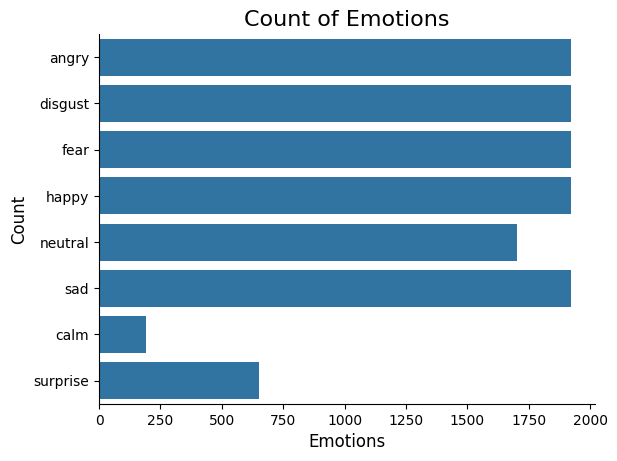

In [9]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

เราสามารถ **พล็อตกราฟ Waveplot และ Spectrogram** สำหรับสัญญาณเสียงได้เช่นกัน

### **📌 คำอธิบาย**  
✅ **Waveplot** - กราฟ **Waveplot** แสดงให้เห็น **ระดับความดังของเสียง** ในแต่ละช่วงเวลา ซึ่งช่วยให้เราเข้าใจโครงสร้างของเสียง เช่น **เสียงดัง-ค่อย** หรือการเปลี่ยนแปลงของพลังงานเสียงตลอดช่วงเวลาของไฟล์เสียง  

✅ **Spectrogram** - **Spectrogram** เป็น **ภาพแสดงช่วงความถี่ของเสียง** ที่เปลี่ยนแปลงไปตามเวลา เป็นการแสดงข้อมูลเสียงในรูปแบบ **สามมิติ (เวลา, ความถี่, และความเข้มของพลังงานเสียง)** ซึ่งช่วยให้เราวิเคราะห์ได้ว่า **เสียงมีการเปลี่ยนแปลงอย่างไรในแต่ละช่วงความถี่**  

การใช้ **Waveplot** และ **Spectrogram** ร่วมกันช่วยให้เราเข้าใจลักษณะของไฟล์เสียงได้ดีขึ้น และยังเป็นแนวทางในการพัฒนา **ตัวจำแนกอารมณ์จากเสียง** ได้อย่างแม่นยำมากขึ้น 🚀

In [10]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

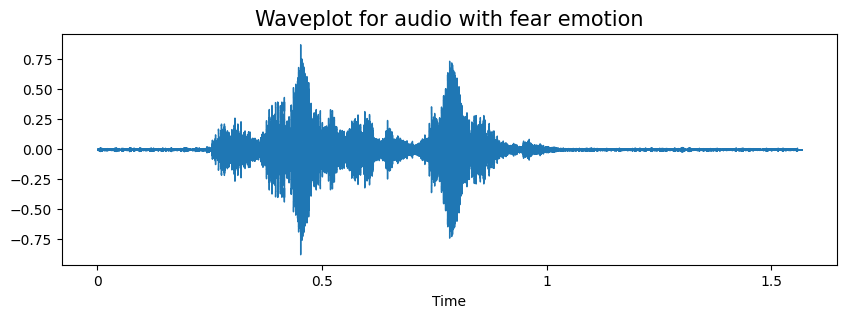

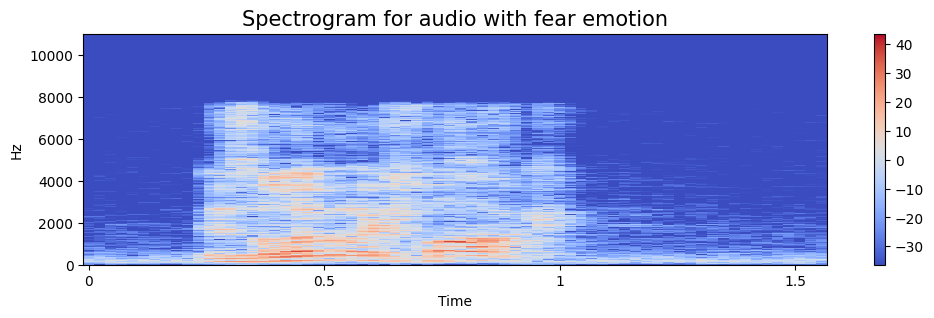

In [11]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

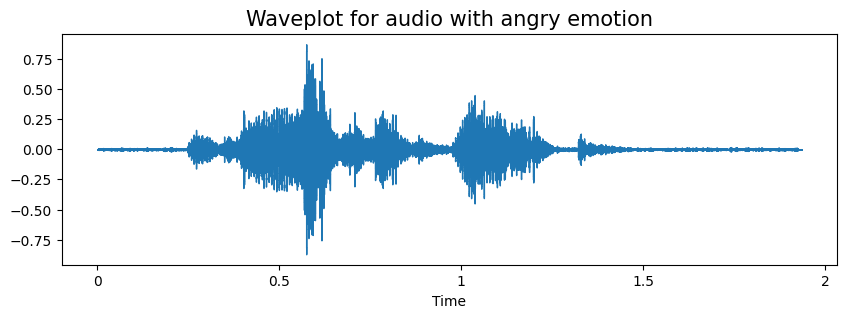

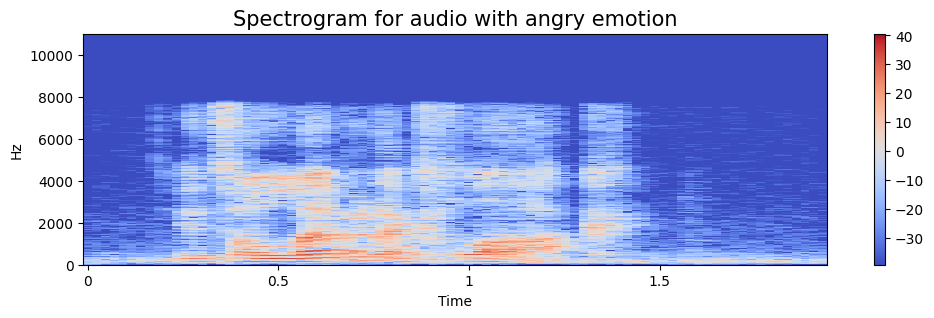

In [12]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

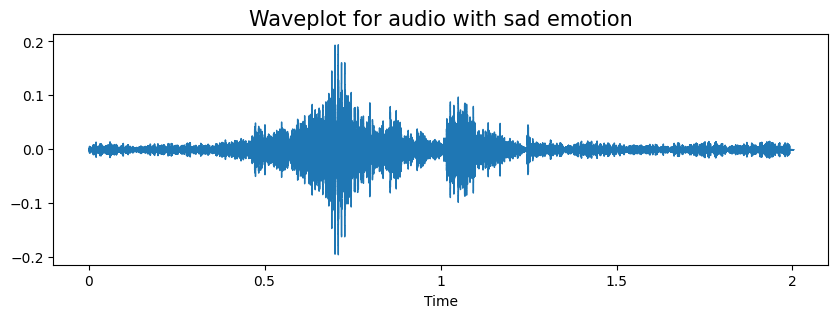

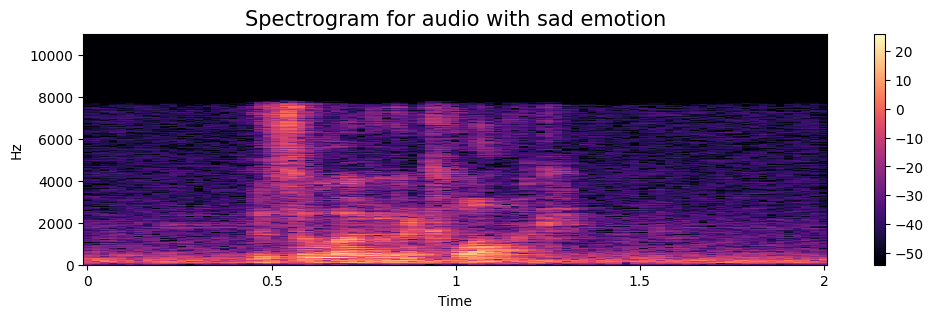

In [13]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

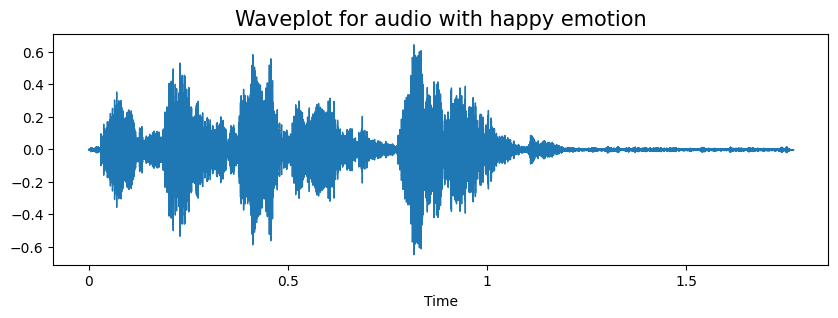

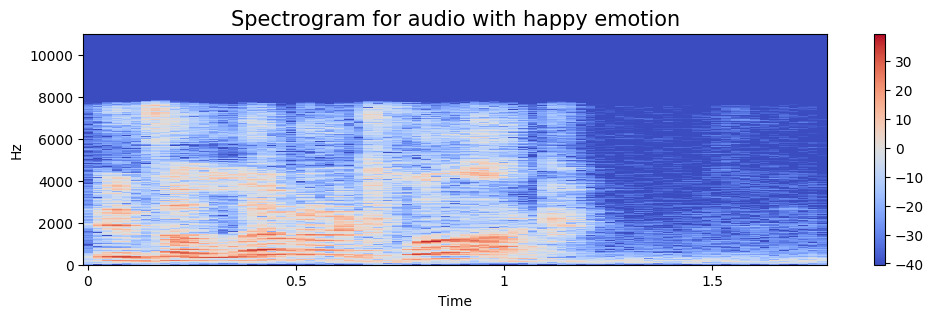

In [14]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

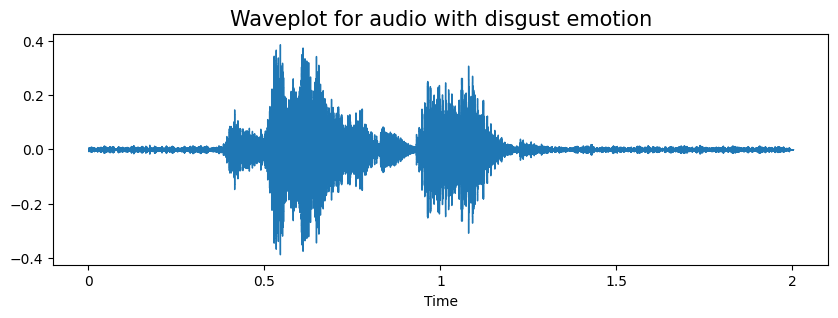

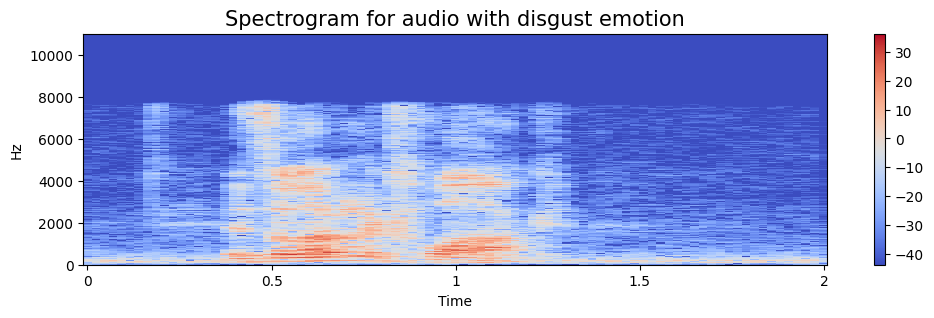

In [15]:
emotion='disgust'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

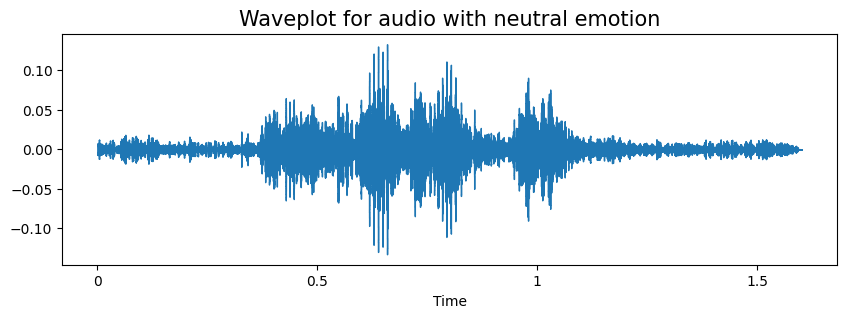

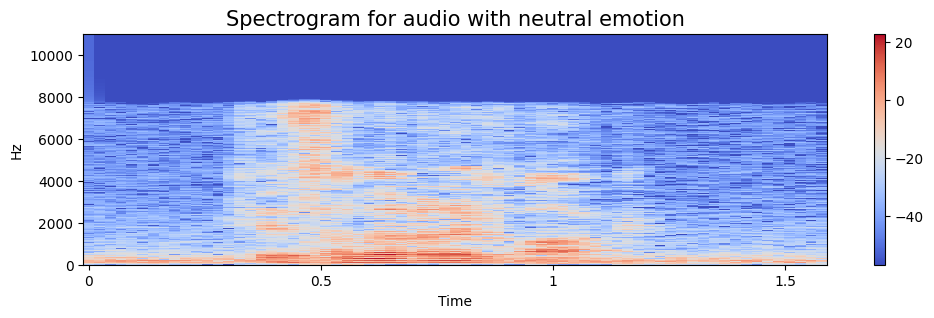

In [16]:
emotion='neutral'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

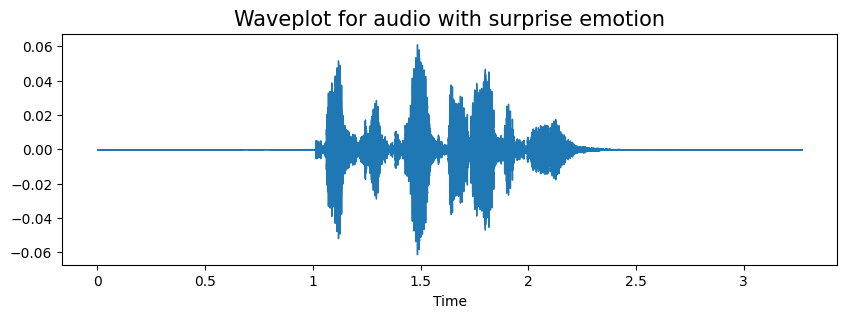

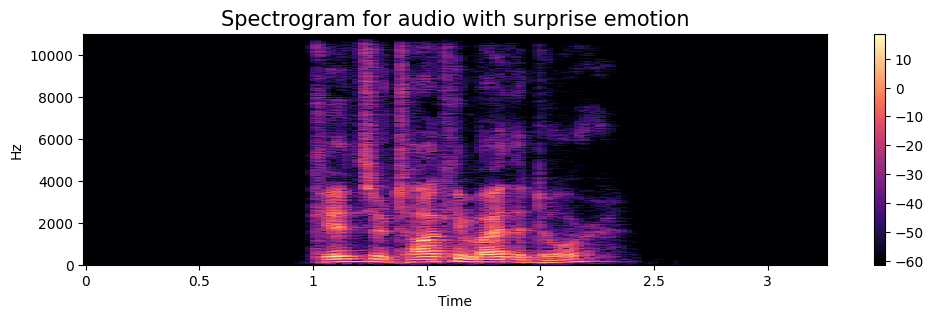

In [17]:
emotion='surprise'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

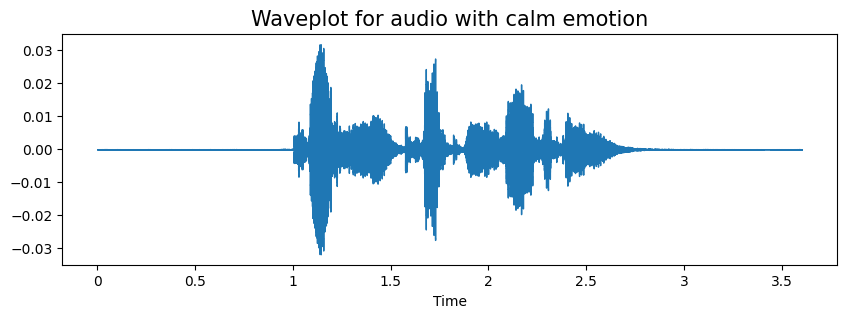

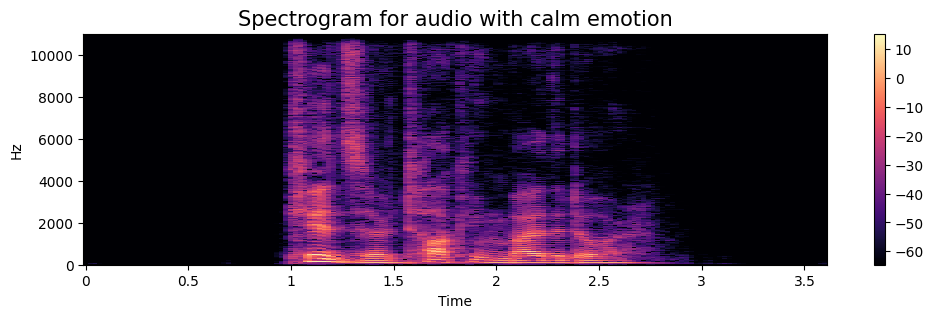

In [18]:
emotion='calm'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

## Data Augmentation

- การขยายข้อมูลคือกระบวนการที่เราสร้างตัวอย่างข้อมูลใหม่โดยการเพิ่มการเบี่ยงเบนเล็กน้อยให้กับข้อมูลที่มีอยู่เดิม
- สำหรับการสร้างข้อมูลสังเคราะห์ในข้อมูลเสียง (Audio) เราสามารถใช้เทคนิคต่างๆ เช่น การเพิ่มเสียงรบกวน (noise injection), การย้ายเวลา (time shifting), การเปลี่ยนเสียง (pitch shifting) และการเปลี่ยนความเร็ว (speed change)
- วัตถุประสงค์ของการขยายข้อมูลคือทำให้โมเดลของเรามีความทนทานต่อการเปลี่ยนแปลงเหล่านี้ และช่วยเพิ่มความสามารถในการทำงานกับข้อมูลที่ไม่เคยเห็นมาก่อน (generalize)
- การเพิ่มการเบี่ยงเบนเหล่านี้จะต้องรักษา label หรือป้ายกำกับ (label) ของตัวอย่างข้อมูลเดิมไว้เหมือนเดิม
- ในกรณีของภาพ การขยายข้อมูลสามารถทำได้โดยการย้ายภาพ (shifting), การซูม (zooming), การหมุน (rotating) และอื่น

ตอนนี้ เราจะทดสอบว่าเทคนิคการขยายข้อมูลใดที่เหมาะสมที่สุดกับชุดข้อมูลของเรา









In [19]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, n_steps=-5):  
    return librosa.effects.pitch_shift(y=data, sr=sampling_rate, n_steps=n_steps)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

#### 1. Simple Audio

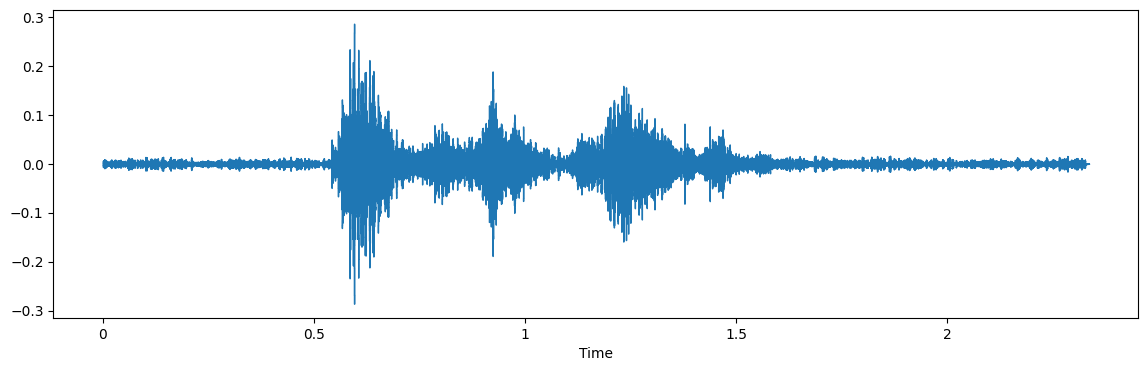

In [20]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

#### 2. Noise Injection

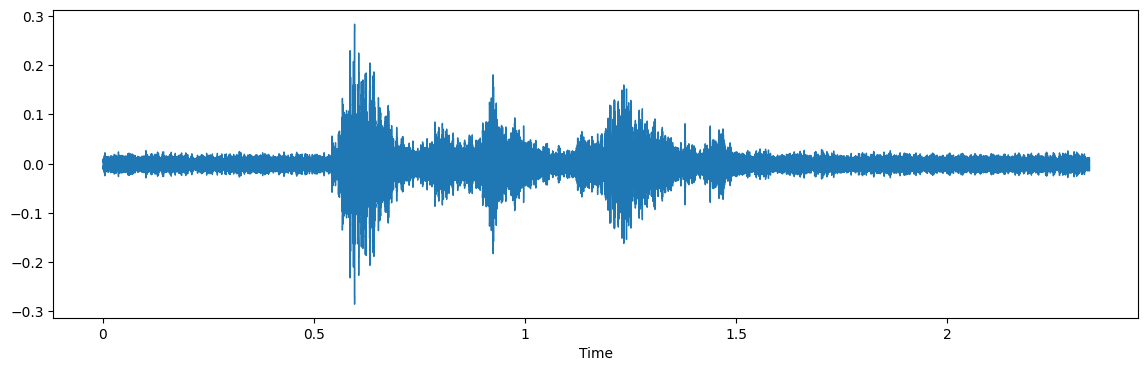

In [21]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

#### 3. Shifting

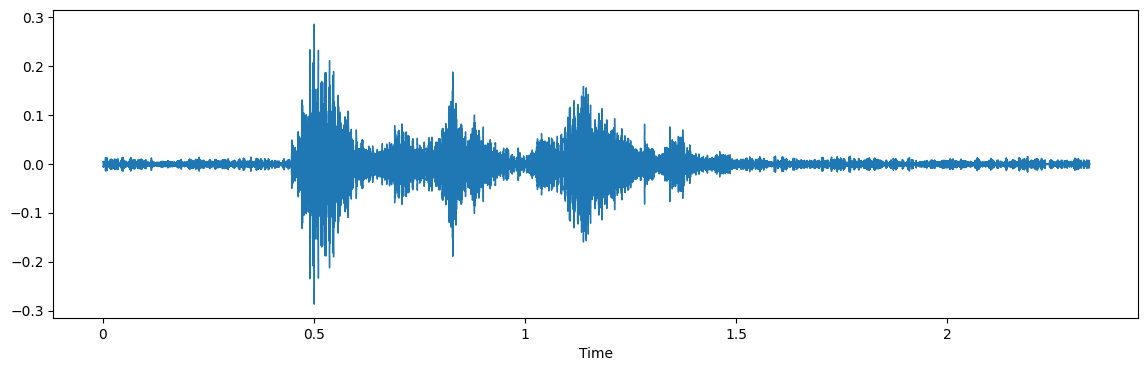

In [22]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

#### 4. Pitch

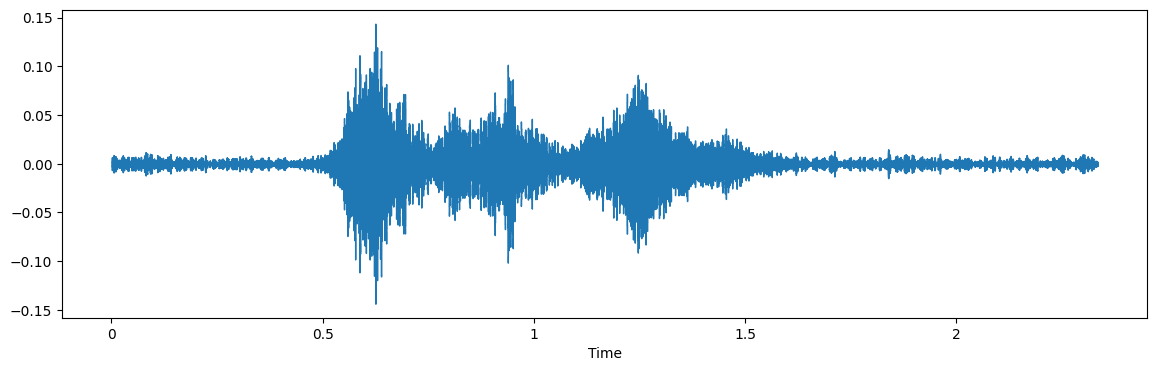

In [23]:
x = pitch(data, sample_rate, n_steps=-5)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

## Feature Extraction
- การสกัดคุณลักษณะ (Feature Extraction) เป็นส่วนสำคัญในการวิเคราะห์และหาความสัมพันธ์ระหว่างข้อมูลต่างๆ ตามที่เราทราบกันดีว่า ข้อมูลเสียงไม่สามารถถูกเข้าใจโดยโมเดลได้โดยตรง ดังนั้นเราจึงต้องแปลงข้อมูลเหล่านี้ให้อยู่ในรูปแบบที่โมเดลสามารถเข้าใจได้ ซึ่งการสกัดคุณลักษณะจะช่วยในขั้นตอนนี้


สัญญาณเสียง (Audio Signal) เป็นสัญญาณสามมิติ ซึ่งมีแกนทั้งสามที่แสดงถึง เวลา (Time), แอมพลิจูด (Amplitude) และ ความถี่ (Frequency)

![image.png](https://miro.medium.com/max/633/1*7sKM9aECRmuoqTadCYVw9A.jpeg)

"พวกเราไม่ใช่ผู้เชี่ยวชาญด้านสัญญาณเสียงและการดึงคุณสมบัติจากไฟล์เสียง ดังนั้นจึงต้องค้นหาและพบบล็อกที่เขียนโดย [Askash Mallik](https://medium.com/heuristics/audio-signal-feature-extraction-and-clustering-935319d2225) ซึ่งอธิบายเกี่ยวกับการดึงคุณสมบัติจากเสียงได้ดีมาก"

ในโปรเจกต์นี้ การแปลงสัญญาณเสียง (audio signal) เพื่อดึงคุณสมบัติ (feature extraction) จะช่วยให้เราได้ข้อมูลที่มีประโยชน์ในการวิเคราะห์ข้อมูลเสียง ข้อมูลเสียงจะถูกแปลงให้สามารถเข้าใจได้โดยการแปลงเป็นรูปแบบที่เป็นเชิงตัวเลขที่เครื่องจักรสามารถประมวลผลได้ ซึ่งมีคุณสมบัติหลายประเภทที่สามารถใช้เพื่อวิเคราะห์สัญญาณเสียงได้ ดังนี้:
1. Zero Crossing Rate: อัตราการเปลี่ยนสัญญาณจากบวกเป็นลบ หรือจากลบเป็นบวกในระยะเวลาของเฟรม
2. Energy: ผลรวมของค่ากำลังสองของค่าความถี่ในสัญญาณ ที่ทำการปรับค่าให้อยู่ในช่วงเฟรมที่เหมาะสม
3. Entropy of Energy: การวัดความไม่แน่นอนหรือความยุ่งเหยิงของพลังงานในช่วงเวลาของสัญญาณ
4. Spectral Centroid: ศูนย์กลางของสเปกตรัม ซึ่งบ่งบอกถึงตำแหน่งที่มีพลังงานมากที่สุดในสเปกตรัม
5. Spectral Spread: โมเมนต์ที่สองของสเปกตรัมที่แสดงถึงความกระจายของพลังงานในสเปกตรัม
6. Spectral Entropy: เอนโทรปีของพลังงานในสเปกตรัมที่ทำการปรับให้มีมิติเล็กลง
7. Spectral Flux: ความแตกต่างระหว่างพลังงานในสเปกตรัมของสองเฟรมที่ต่อเนื่องกัน
8. Spectral Rolloff: ความถี่ที่มีพลังงาน 90% ของสเปกตรัมถูกกระจุกตัวอยู่
9. MFCC (Mel Frequency Cepstral Coefficients): การแทนสัญญาณเสียงในลักษณะของเซพสตรัมที่กระจายตามสเกลเมล ไม่เป็นเส้นตรง
10. Chroma Vector: การแทนพลังงานในสเปกตรัมในรูปแบบเวกเตอร์ที่ประกอบด้วย 12 ค่า ที่แสดงถึง 12 คลาสของโน้ตที่มีระยะห่างในทำนองแบบตะวันตก
11. Chroma Deviation: ค่ามาตรฐานเบี่ยงเบนของ 12 ค่าจากเวกเตอร์ chroma

ในโปรเจกต์นี้ เราจะไม่ลงลึกไปในกระบวนการเลือกคุณสมบัติ (feature selection) เพื่อทดสอบว่าคุณสมบัติใดเหมาะสมที่สุดกับชุดข้อมูลของเรา แต่จะเลือกดึงคุณสมบัติ 5 อย่างเพื่อฝึกโมเดล ได้แก่:
- **Zero Crossing Rate**: อัตราการเปลี่ยนสัญญาณจากบวกเป็นลบหรือจากลบเป็นบวกในช่วงเวลาหนึ่งของเฟรม
- **Chroma_stft**: การแทนพลังงานสเปกตรัมในรูปแบบของเวกเตอร์ chroma ซึ่งแสดงถึงพลังงานของแต่ละโน้ตที่มีระยะห่างของเสียงตามทำนองที่เท่ากัน
- **MFCC (Mel-frequency cepstral coefficients)**: การแทนสัญญาณเสียงในรูปแบบของเซพสตรัมที่ไม่เป็นเชิงเส้น แต่กระจายตามสเกลเมล
- **RMS (Root Mean Square)**: ค่าเฉลี่ยที่ใช้ในการคำนวณขนาดของพลังงานเสียงในช่วงเวลา
- **MelSpectrogram**: การแปลงสัญญาณเสียงเป็นสเปกโทรแกรมในโดเมนเมลสเกล


In [24]:
def extract_features(data, sample_rate):
    result = np.array([])

    # ✅ Zero Crossing Rate (ZCR)
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result = np.hstack((result, zcr))

    # ✅ Chroma Features
    stft = np.abs(librosa.stft(data))
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma))

    # ✅ MFCC (40 coefficients)
    mfcc = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40)
    mfcc = np.mean(mfcc.T, axis=0)
    result = np.hstack((result, mfcc))

    # ✅ RMS Energy (ช่วยแยกเสียงเบา-ดัง)
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms))

    # ✅ Spectral Contrast (ช่วยจับความแตกต่างของพลังงานในแต่ละย่านความถี่)
    contrast = np.mean(librosa.feature.spectral_contrast(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, contrast))

    # ✅ Tonnetz (ช่วยแยกโครงสร้างโทนเสียง)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(data), sr=sample_rate).T, axis=0)
    result = np.hstack((result, tonnetz))

    # ✅ Mel Spectrogram
    mel = librosa.feature.melspectrogram(y=data, sr=sample_rate)
    mel = np.mean(mel.T, axis=0)
    result = np.hstack((result, mel))

    # ✅ ปรับขนาดให้เท่ากันทุกไฟล์ (Padding หรือ Resampling)
    target_length = 200  # ปรับค่าตามที่เหมาะสม
    if len(result) < target_length:
        result = pad_sequences([result], maxlen=target_length, padding="post", dtype="float32")[0]
    else:
        result = scipy.signal.resample(result, target_length)

    return result

def get_features(path):
    # โหลดไฟล์เสียง (Mono)
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # Extract features จากไฟล์ต้นฉบับ
    res1 = extract_features(data, sample_rate)
    result = np.array(res1)

    # ✅ เพิ่ม noise
    noise_data = noise(data)
    res2 = extract_features(noise_data, sample_rate)
    result = np.vstack((result, res2))  # รวม feature ตามแนวตั้ง

    # ✅ ใช้ pitch-shifting และ time-shifting
    new_data = pitch(data, sample_rate)  # ✅ ส่ง sample_rate ไปด้วย
    data_pitch_shift = shift(new_data)   # ✅ shift() ไม่ต้องใช้ sample_rate
    res3 = extract_features(data_pitch_shift, sample_rate)
    result = np.vstack((result, res3))

    return result


In [25]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [26]:
len(X), len(Y), data_path.Path.shape

(36486, 36486, (12162,))

In [27]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,labels
0,0.085690,0.671934,0.694386,0.672386,0.675260,0.674322,0.579565,0.578604,0.647424,0.650719,...,4.925763e-08,4.833769e-08,4.774562e-08,4.738036e-08,0.0,0.0,0.0,0.0,0.0,angry
1,0.288273,0.751576,0.763369,0.792474,0.828941,0.797289,0.661697,0.650645,0.707131,0.705752,...,5.717744e-03,5.832130e-03,5.668369e-03,5.693182e-03,0.0,0.0,0.0,0.0,0.0,angry
2,0.064400,0.596361,0.555842,0.642564,0.684404,0.734919,0.804803,0.772702,0.734026,0.711819,...,3.792623e-06,3.748526e-06,3.718231e-06,3.697648e-06,0.0,0.0,0.0,0.0,0.0,angry
3,0.078444,0.718596,0.729192,0.653268,0.665332,0.687527,0.602966,0.577669,0.618406,0.681478,...,3.350527e-07,3.278495e-07,3.231356e-07,3.202182e-07,0.0,0.0,0.0,0.0,0.0,disgust
4,0.268138,0.836372,0.812923,0.787344,0.823742,0.837018,0.722575,0.669939,0.697234,0.719956,...,2.912614e-03,2.953418e-03,2.719259e-03,2.805172e-03,0.0,0.0,0.0,0.0,0.0,disgust


* เราได้ทำการเพิ่มข้อมูลและแยกคุณสมบัติสำหรับไฟล์เสียงแต่ละไฟล์และบันทึกไว้

## Data Preparation

- ขณะนี้เราได้แยกข้อมูลออกมาแล้ว ต่อไปเราต้องทำให้ข้อมูลเป็นมาตรฐานและแยกส่วนสำหรับการฝึกอบรมและการทดสอบ

In [28]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [29]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()
print(encoder.categories_)

[array(['angry', 'calm', 'disgust', 'fear', 'happy', 'neutral', 'sad',
       'surprise'], dtype=object)]


In [30]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 200), (27364, 8), (9122, 200), (9122, 8))

In [31]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 200), (27364, 8), (9122, 200), (9122, 8))

In [32]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 200, 1), (27364, 8), (9122, 200, 1), (9122, 8))

## Modelling (CNN + GRU)

In [33]:
model = Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

#  GRU Layer 
model.add(GRU(64, return_sequences=True))
model.add(GRU(32))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(8, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 200, 256)       │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 100, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 100, 128)       │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 50, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 50, 64)         │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 25, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 25, 64)         │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,216 (946.16 KB)

 Trainable params: 242,216 (946.16 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 23s 43ms/step - accuracy: 0.2459 - loss: 1.8799 - val_accuracy: 0.3134 - val_loss: 1.7043 - learning_rate: 0.0010
Epoch 2/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - accuracy: 0.3300 - loss: 1.6833 - val_accuracy: 0.3797 - val_loss: 1.5307 - learning_rate: 0.0010
Epoch 3/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 18s 43ms/step - accuracy: 0.4014 - loss: 1.5032 - val_accuracy: 0.4555 - val_loss: 1.3648 - learning_rate: 0.0010
Epoch 4/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - accuracy: 0.4414 - loss: 1.4135 - val_accuracy: 0.4724 - val_loss: 1.3231 - learning_rate: 0.0010
Epoch 5/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.4632 - loss: 1.3530 - val_accuracy: 0.4866 - val_loss: 1.2787 - learning_rate: 0.0010
Epoch 6/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.4951 - loss: 1.2883 - val_accuracy: 0.5053 - val_loss: 1.2518 - learning_rate: 0.0010
Epoch 7/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.5076 - l

286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5989 - loss: 1.0599
Accuracy of our model on test data :  59.03310775756836 %


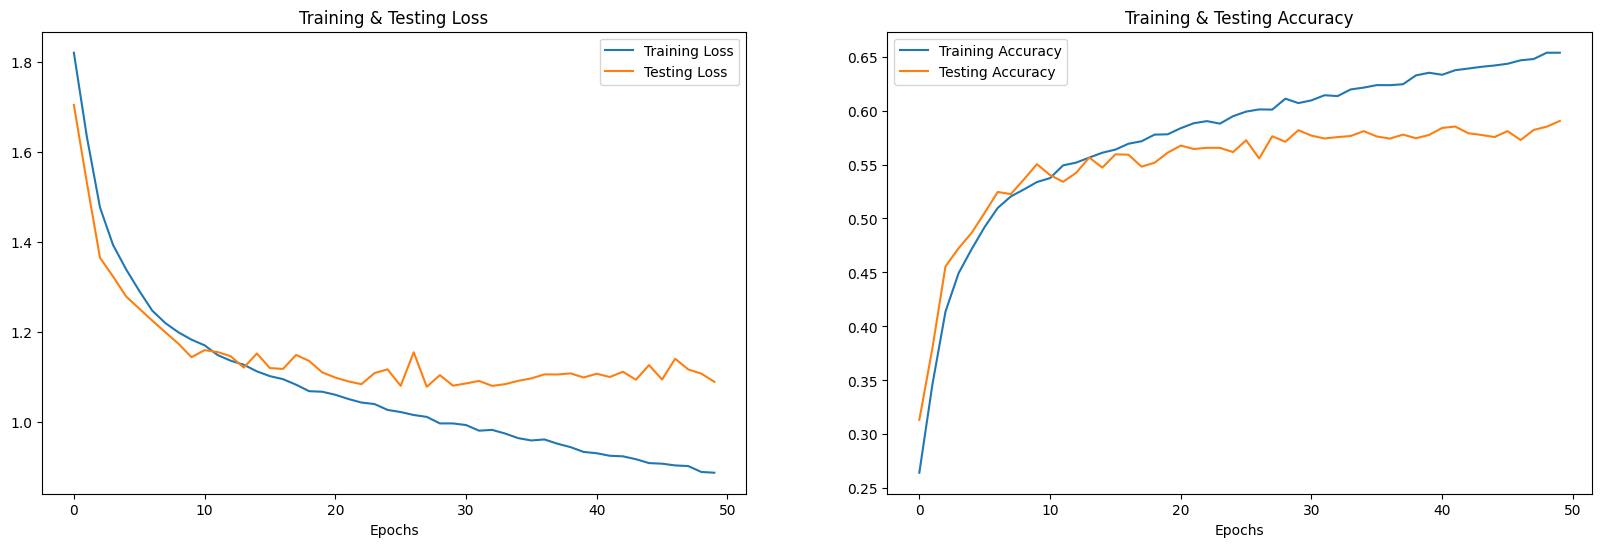

In [35]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [36]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

286/286 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [37]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,angry,happy
1,neutral,neutral
2,angry,angry
3,sad,sad
4,neutral,fear
5,fear,fear
6,happy,happy
7,disgust,disgust
8,fear,sad
9,neutral,sad


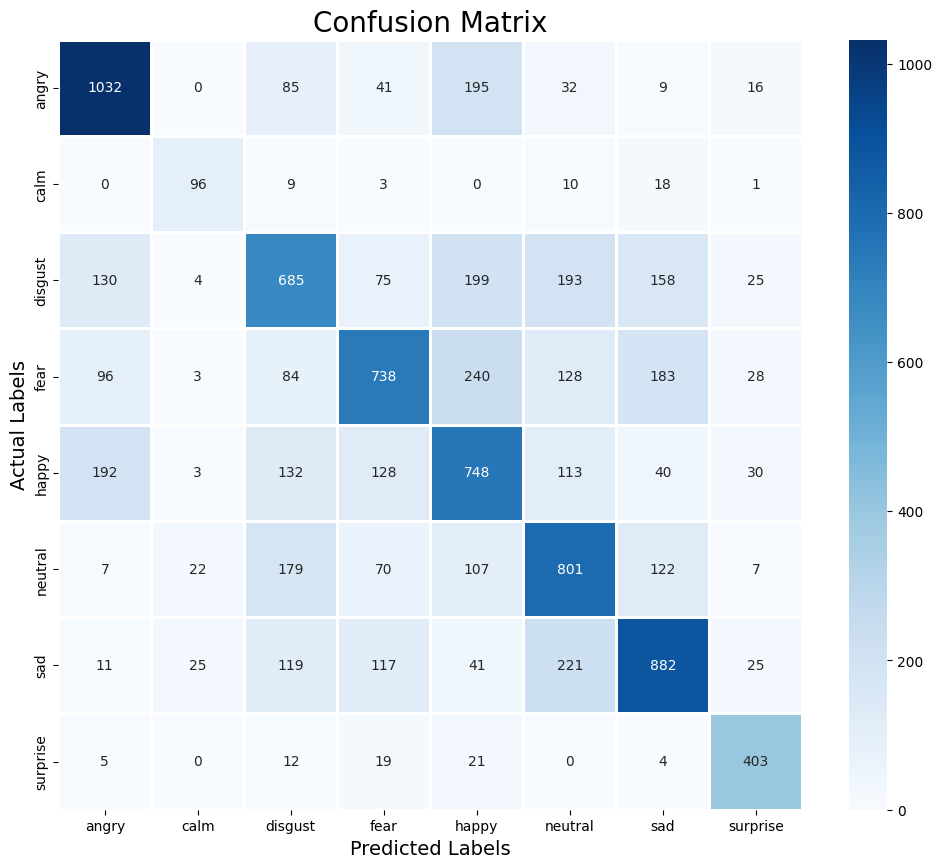

In [38]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.70      0.73      0.72      1410
        calm       0.63      0.70      0.66       137
     disgust       0.52      0.47      0.49      1469
        fear       0.62      0.49      0.55      1500
       happy       0.48      0.54      0.51      1386
     neutral       0.53      0.61      0.57      1315
         sad       0.62      0.61      0.62      1441
    surprise       0.75      0.87      0.81       464

    accuracy                           0.59      9122
   macro avg       0.61      0.63      0.62      9122
weighted avg       0.59      0.59      0.59      9122



- เราจะเห็นว่าโมเดลของเรามีความแม่นยำมากขึ้นในการคาดการณ์ความประหลาดใจ อารมณ์โกรธ และนั่นก็สมเหตุสมผลเพราะไฟล์เสียงของอารมณ์เหล่านี้แตกต่างจากไฟล์เสียงอื่นในหลายๆ ด้าน เช่น ระดับเสียง ความเร็ว เป็นต้น
- โดยรวมแล้ว เราประสบความสำเร็จในการทดสอบข้อมูลด้วยความแม่นยำ 58% และถือว่าอยู่ในระดับที่ดี แต่เราสามารถปรับปรุงให้ดีขึ้นได้อีกโดยใช้เทคนิคการเสริมเพิ่มเติมและวิธีการสกัดคุณลักษณะอื่นๆ

# การนำไฟล์เสียงมาทดสอบ

In [49]:
# ใช้ป้ายกำกับที่ใช้จริงจากการ One-Hot Encoding
emotion_labels = encoder.categories_[0]  # ดึง label ที่ OneHotEncoder ใช้ตอนเทรน

def predict_emotion(audio_path, model):
    y, sr = librosa.load(audio_path, duration=3, offset=0.5)  # โหลดเสียง
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)  # คำนวณ MFCC
    mfccs = np.mean(mfccs.T, axis=0)  # ทำให้เป็น 1D

    # ตรวจสอบขนาดของ MFCC
    print(f"MFCC shape before padding/resampling: {mfccs.shape}")

    # ปรับขนาดให้ตรงกับ 162
    target_length = 162
    if len(mfccs) < target_length:
        mfccs = pad_sequences([mfccs], maxlen=target_length, padding="post", dtype="float32")[0]
    else:
        mfccs = scipy.signal.resample(mfccs, target_length)

    # Reshape ให้ตรงกับรูปแบบที่โมเดลต้องการ (1, 162, 1)
    mfccs = np.expand_dims(mfccs, axis=0)  # (1, 162)
    mfccs = np.expand_dims(mfccs, axis=-1)  # (1, 162, 1)

    # ทำนายอารมณ์
    prediction = model.predict(mfccs)
    emotion_index = np.argmax(prediction)  # หา index ของค่าคะแนนสูงสุด
    confidence = prediction[0][emotion_index]  # ค่าความมั่นใจของคลาสที่โมเดลเลือก

    # แสดงค่าความมั่นใจของทุกอารมณ์
    for i, label in enumerate(emotion_labels):
        print(f"{label}: {prediction[0][i]:.4f}")

    # แสดงผลลัพธ์ที่โมเดลทำนาย
    emotion_label = emotion_labels[emotion_index]  
    print(f"Predicted Emotion: {emotion_label} (Confidence: {confidence:.2f})")

    return emotion_label

# เล่นไฟล์เสียง
def play_audio(audio_path):
    sound = AudioSegment.from_file(audio_path)
    play(sound)

# ทดสอบไฟล์เสียง
folder_path = "DATASET/AudioWAV/1091_IEO_NEU_XX.wav"
predict_emotion(folder_path, model)
play_audio(folder_path)


MFCC shape before padding/resampling: (40,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
angry: 0.0000
calm: 0.0000
disgust: 0.0001
fear: 0.0000
happy: 0.0000
neutral: 0.9996
sad: 0.0003
surprise: 0.0000
Predicted Emotion: neutral (Confidence: 1.00)


# เอาไว้เช็ค DEBUG

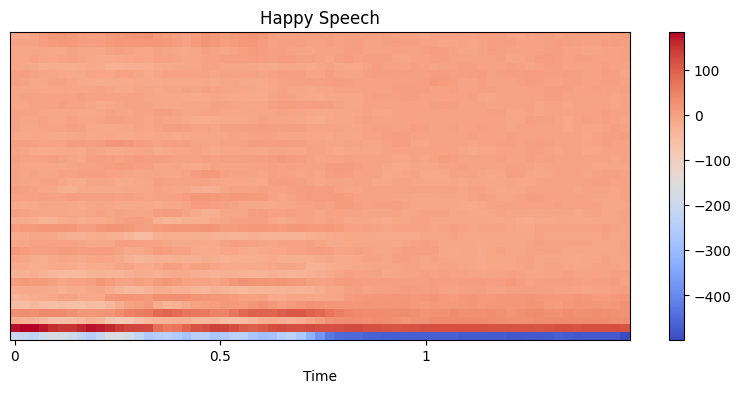

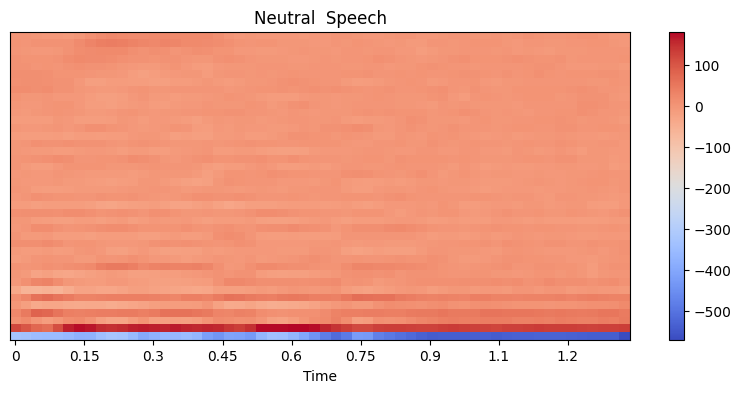

In [48]:
import matplotlib.pyplot as plt

def plot_mfcc(audio_path, title):
    y, sr = librosa.load(audio_path, duration=3, offset=0.5)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, x_axis="time", sr=sr)
    plt.colorbar()
    plt.title(title)
    plt.show()

plot_mfcc("DATASET/AudioWAV/1001_IOM_HAP_XX.wav", "Happy Speech")
plot_mfcc("DATASET/AudioWAV/1091_IEO_NEU_XX.wav", "Neutral  Speech")


In [42]:
test_data = [
    ("DATASET/TESS Toronto emotional speech set data/Fear/OAF_back_fear.wav", "fear"),
    ("DATASET/TESS Toronto emotional speech set data/happy/OAF_back_happy.wav", "happy"),
    ("DATASET/TESS Toronto emotional speech set data/neutral/OA_bite_neutral.wav", "neutral"),
]

correct = 0

for file_path, true_label in test_data:
    predicted_emotion = predict_emotion(file_path, model)
    is_correct = predicted_emotion == true_label
    correct += is_correct
    print(f"File: {file_path}, True: {true_label}, Predicted: {predicted_emotion}, Correct: {is_correct}")

accuracy = correct / len(test_data)
print(f"Model Accuracy: {accuracy:.2%}")


MFCC shape before padding/resampling: (40,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
angry: 0.0000
calm: 0.0000
disgust: 0.0001
fear: 0.0000
happy: 0.0000
neutral: 0.9981
sad: 0.0018
surprise: 0.0000
Predicted Emotion: neutral (Confidence: 1.00)
File: DATASET/TESS Toronto emotional speech set data/Fear/OAF_back_fear.wav, True: fear, Predicted: neutral, Correct: False
MFCC shape before padding/resampling: (40,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
angry: 0.0000
calm: 0.0000
disgust: 0.0001
fear: 0.0000
happy: 0.0000
neutral: 0.9995
sad: 0.0004
surprise: 0.0000
Predicted Emotion: neutral (Confidence: 1.00)
File: DATASET/TESS Toronto emotional speech set data/happy/OAF_back_happy.wav, True: happy, Predicted: neutral, Correct: False
MFCC shape before padding/resampling: (40,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
angry: 0.0000
calm: 0.0000
disgust: 0.0009
fear: 0.0000
happy: 0.0000
neutral: 0.9958
sad: 0.0033
surprise: 0.0000
Predicted Emotion: neutral (Confidence: 1.00)
File: DATASET/TESS T

เพิ่มฟีเจอร์เสียงที่ช่วยแยกอารมณ์

In [43]:
import librosa.display

def extract_features(audio_path):
    y, sr = librosa.load(audio_path, duration=3, offset=0.5)
    
    # MFCC
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    mfccs = np.mean(mfccs.T, axis=0)

    # Spectral Contrast
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    spectral_contrast = np.mean(spectral_contrast.T, axis=0)

    # Chroma Features
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    chroma = np.mean(chroma.T, axis=0)

    # รวมฟีเจอร์ทั้งหมดเป็นเวกเตอร์เดียว
    feature_vector = np.hstack([mfccs, spectral_contrast, chroma])
    return feature_vector

# ลองดูว่าฟีเจอร์ของ angry กับ neutral ต่างกันแค่ไหน
angry_features = extract_features("DATASET/TESS Toronto emotional speech set data/angry/OAF_lean_angry.wav")
neutral_features = extract_features("DATASET/TESS Toronto emotional speech set data/neutral/OAF_lean_neutral.wav")

print("Feature Vector Shape:", angry_features.shape)
print("Angry Sample:", angry_features[:10])  
print("Neutral Sample:", neutral_features[:10])  


Feature Vector Shape: (59,)
Angry Sample: [-404.33358765   64.20172119   10.23393154   11.20071697  -19.17625237
   12.06525993  -16.85406494  -12.44943523  -25.9381237   -19.07823944]
Neutral Sample: [-563.78991699  112.01947021   39.33531952   16.69286728    9.72343445
   15.62122631   -1.83237493   -8.80646801  -13.51754284  -11.68898964]


วิเคราะห์ Bias ของโมเดล

MFCC shape before padding/resampling: (40,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
angry: 0.0001
calm: 0.0000
disgust: 0.0441
fear: 0.0000
happy: 0.0000
neutral: 0.9478
sad: 0.0079
surprise: 0.0000
Predicted Emotion: neutral (Confidence: 0.95)
MFCC shape before padding/resampling: (40,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
angry: 0.0018
calm: 0.0000
disgust: 0.7681
fear: 0.0000
happy: 0.0004
neutral: 0.2245
sad: 0.0047
surprise: 0.0006
Predicted Emotion: disgust (Confidence: 0.77)
MFCC shape before padding/resampling: (40,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
angry: 0.0000
calm: 0.0000
disgust: 0.0028
fear: 0.0000
happy: 0.0000
neutral: 0.9917
sad: 0.0055
surprise: 0.0000
Predicted Emotion: neutral (Confidence: 0.99)
MFCC shape before padding/resampling: (40,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
angry: 0.0032
calm: 0.0000
disgust: 0.7868
fear: 0.0000
happy: 0.0009
neutral: 0.2015
sad: 0.0054
surprise: 0.0022
Predicted Emotion: disgust (Confidence: 0.79)


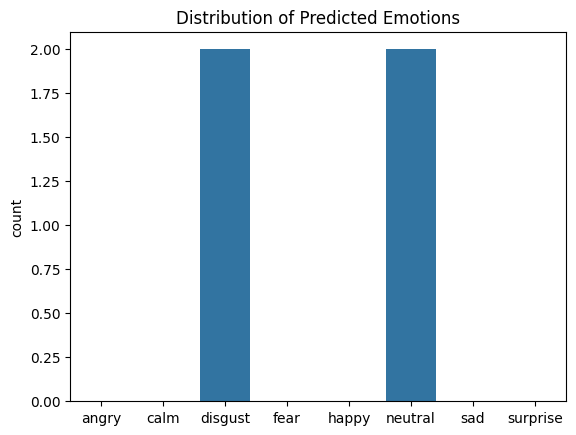

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_predictions(test_data):
    all_predictions = []
    
    for file_path, true_label in test_data:
        predicted_emotion = predict_emotion(file_path, model)
        all_predictions.append(predicted_emotion)
    
    sns.countplot(x=all_predictions, order=emotion_labels)
    plt.title("Distribution of Predicted Emotions")
    plt.show()

test_data = [
    ("DATASET/AudioWAV/1001_DFA_ANG_XX.wav", "angry"),
    ("DATASET/AudioWAV/1091_TSI_HAP_XX.wav", "happy"),
    ("DATASET/AudioWAV/1091_WSI_SAD_XX.wav", "sad"),
    ("DATASET/AudioWAV/1091_IWW_NEU_XX.wav", "neutral"),
]

analyze_predictions(test_data)
